In [1]:
# TensorFlow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [33]:
# Loads array of train axial 0000.npy
axial0000 = np.load(r'C:\Users\bliu0\Downloads\MRNet-v1.0\train\axial\0000.npy')

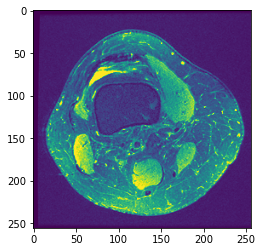

In [3]:
# Visualize np array, axial 0000
imgplot = plt.imshow(axial0000[9])

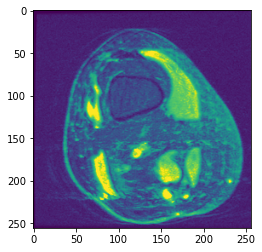

In [48]:
# Visualize axial 1152 array
imgplot1 = plt.imshow(np.load(r'C:\Users\bliu0\Downloads\MRNet-v1.0\valid\axial\1152.npy')[0])

In [42]:
# LOADING DATA
train_data = []
test_data = []

In [43]:
for x in os.listdir(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/axial/'):
    try:
        train_data.append([np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/axial/'+x)[0],
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/coronal/'+x)[0],
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/sagittal/'+x)[0]])
    except:
        print(x)
for x in os.listdir(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/'):
    try:
        test_data.append([np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/'+x)[0],
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/coronal/'+x)[0],
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/sagittal/'+x)[0]])
    except:
        print(x)

.DS_Store


In [57]:
np.array(train_data).shape

(1130, 3, 256, 256)

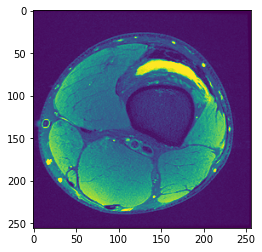

In [66]:
plt.imshow(train_data[1129][0])

In [11]:
train_data

[[array([[[ 0,  0,  0, ...,  5,  4,  3],
          [ 0,  0,  0, ...,  8,  6,  8],
          [ 0,  0,  0, ..., 14, 11, 11],
          ...,
          [ 0,  0,  0, ..., 16, 15, 12],
          [ 0,  0,  0, ..., 12, 13, 12],
          [ 0,  0,  0, ..., 11,  7,  9]],
  
         [[ 0,  0,  0, ...,  3,  2,  2],
          [ 0,  0,  0, ...,  9,  7,  7],
          [ 0,  0,  0, ..., 13, 10, 10],
          ...,
          [ 0,  0,  0, ..., 12, 15, 13],
          [ 0,  0,  0, ..., 14, 12, 12],
          [ 0,  0,  0, ...,  6,  5,  7]],
  
         [[ 0,  0,  0, ...,  1,  1,  1],
          [ 0,  0,  0, ...,  8,  6,  6],
          [ 0,  0,  0, ..., 11, 13, 10],
          ...,
          [ 0,  0,  0, ..., 13, 13, 16],
          [ 0,  0,  0, ..., 10, 10, 12],
          [ 0,  0,  0, ...,  6,  6,  5]],
  
         ...,
  
         [[ 0,  0,  0, ...,  1,  1,  1],
          [ 0,  0,  0, ...,  5,  4,  4],
          [ 0,  0,  0, ...,  8,  9, 11],
          ...,
          [ 0,  0,  0, ..., 14, 16, 13],
         

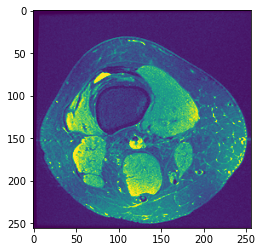

In [12]:
# Plot train_data - first [] represents each patient - second [] represents axial, coronal, or sagittal in that order - third [] represents layer
imgplot = plt.imshow(train_data[0][0][0])

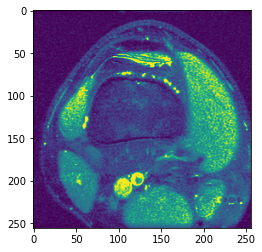

In [13]:
# Plot test_data - first [] represents each patient - second [] represents axial, coronal, or sagittal in that order - third [] represents layer
imgplot = plt.imshow(test_data[0][0][0])

In [116]:
# LOADING LABELS FROM CSV
train_ab_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-acl.csv', index_col=0)
train_acl_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-acl.csv', index_col=0)
train_meni_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-meniscus.csv',index_col=0)
test_ab_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-abnormal.csv',index_col=0)
test_acl_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-acl.csv',index_col=0)
test_meni_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-meniscus.csv',index_col=0)

In [120]:
train_labels = [[1,0,0]]
test_labels = [[0,0,0]]

In [121]:
for x in range(1129):
  train_labels.append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
for x in range(119):
  test_labels.append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])

In [122]:
train_labels[:3], test_labels[:3]

([[1, 0, 0], [1, 1, 1], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]])

In [146]:
train_labels = np.array(train_labels)
train_data = np.array(train_data)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [147]:
train_data.shape,train_labels.shape

((1130, 3, 256, 256), (1130, 3))

# Model

In [171]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(3,256,256)),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(3,activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model.fit(train_data,train_labels,epochs=50)

Epoch 1/50
36/36 [==============================] - 16s 447ms/step - loss: 1958.0803 - accuracy: 0.2761
Epoch 2/50
36/36 [==============================] - 16s 441ms/step - loss: 155.5924 - accuracy: 0.3389
Epoch 3/50
36/36 [==============================] - 16s 445ms/step - loss: 32.0101 - accuracy: 0.3027
Epoch 4/50
36/36 [==============================] - 16s 451ms/step - loss: 15.3681 - accuracy: 0.3584
Epoch 5/50
36/36 [==============================] - 16s 444ms/step - loss: 13.6097 - accuracy: 0.3416
Epoch 6/50
36/36 [==============================] - 16s 441ms/step - loss: 8.0369 - accuracy: 0.3549
Epoch 7/50
36/36 [==============================] - 16s 441ms/step - loss: 10.1876 - accuracy: 0.3150
Epoch 8/50
36/36 [==============================] - 16s 442ms/step - loss: 8.1312 - accuracy: 0.3363
Epoch 9/50
36/36 [==============================] - 16s 443ms/step - loss: 6.2687 - accuracy: 0.3575
Epoch 10/50
36/36 [==============================] - 16s 443ms/step - loss: 6.0829

In [172]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 54ms/step - loss: 22.1478 - accuracy: 0.1000


[22.147790908813477, 0.10000000149011612]

In [173]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 196608)            0         
_________________________________________________________________
dense_145 (Dense)            (None, 750)               147456750 
_________________________________________________________________
dense_146 (Dense)            (None, 750)               563250    
_________________________________________________________________
dense_147 (Dense)            (None, 750)               563250    
_________________________________________________________________
dense_148 (Dense)            (None, 3)                 2253      
Total params: 148,585,503
Trainable params: 148,585,503
Non-trainable params: 0
_________________________________________________________________


In [174]:
test_data.shape, test_labels.shape

((120, 3, 256, 256), (120, 3))